In [1]:
import nibabel as nib

In [2]:
import dipy.data as dpd

In [3]:
img = dpd.read_stanford_t1()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


In [4]:
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

In [5]:
data = img.get_data()

In [6]:
data.shape

(81, 106, 76)

/Users/arokem/anaconda/lib/python3.5/site-packages/numpy-1.11.0b2-py3.5-macosx-10.5-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will return a copy of the mask. In the future, it will try to return both as views.
  FutureWarning


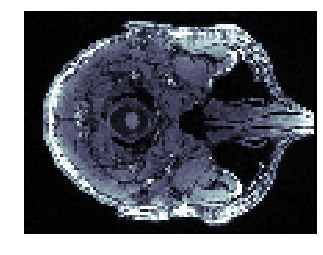

In [17]:
fig, ax = plt.subplots(1)
ax.set_axis_off()
fig.add_axes(ax)

label = 0
for i in list(range(data.shape[-1])) + list(range(data.shape[-1]-1, 0, -1)):
    im = ax.imshow(data[:, :, i], 
                   cmap=plt.get_cmap('bone'), 
                   animated=True, 
                   interpolation='nearest', 
                   vmax=data.max(), 
                   vmin=data.min())
    fig.savefig("_fig%03d.png"%label)
    label = label + 1


In [9]:
# Follow with ImageMagick: `convert -quality 100 *.png mri-zstack.mpeg`
# And then use QuickTime to export into mov.